<a href="https://colab.research.google.com/github/JavZon/Machine_Learning/blob/main/Working_with_NaNs2_workplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn


In [2]:
url="https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df=pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(df, test_size=0.2, random_state=45)


In [4]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13240,-117.67,34.12,15.0,3162.0,495.0,1145.0,473.0,5.3525,191700.0,INLAND
12586,-121.50,38.53,37.0,3642.0,684.0,1508.0,657.0,3.5231,114300.0,INLAND
13123,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,144600.0,INLAND
15456,-117.28,33.18,16.0,3002.0,591.0,842.0,538.0,2.1205,157300.0,NEAR OCEAN
19798,-123.12,40.54,23.0,1091.0,217.0,539.0,201.0,1.8696,61500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16547,-121.22,37.81,20.0,1811.0,352.0,1191.0,327.0,4.0125,121500.0,INLAND
16317,-121.32,38.00,22.0,2105.0,521.0,781.0,483.0,2.2130,87500.0,INLAND
12895,-121.33,38.65,24.0,3533.0,741.0,1496.0,723.0,2.8106,183200.0,INLAND
6012,-117.78,34.07,18.0,3610.0,772.0,2899.0,765.0,3.9784,113500.0,INLAND


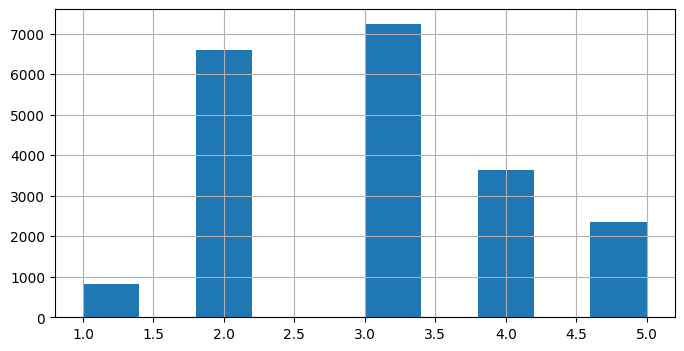

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [3]:
df['income_cat'] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])
df['income_cat'].hist(figsize=(8,4))
plt.show()
df.head()

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=45)

for train_index, test_index in sss.split(df, df['income_cat']):
  str_train_set=df.loc[train_index]
  str_test_set=df.loc[test_index]

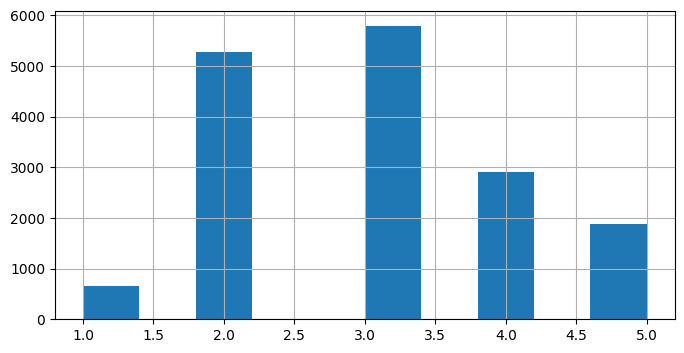

In [5]:
str_train_set['income_cat'].hist(figsize=(8,4))
plt.show()

In [6]:
str_train_set.drop(columns='income_cat', inplace=True)
str_test_set.drop(columns='income_cat', inplace=True)

In [7]:
str_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16908,-122.37,37.58,34.0,2697.0,313.0,810.0,279.0,12.4291,500001.0,NEAR OCEAN
634,-122.16,37.71,37.0,1507.0,242.0,632.0,253.0,4.5553,191000.0,NEAR BAY
10909,-117.86,33.74,32.0,691.0,151.0,926.0,148.0,4.1250,175900.0,<1H OCEAN
3736,-118.40,34.18,32.0,3724.0,899.0,1912.0,791.0,3.5711,312700.0,<1H OCEAN
14749,-117.05,32.57,22.0,2857.0,516.0,2412.0,496.0,4.7337,127600.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
1249,-122.09,39.13,28.0,4169.0,895.0,2587.0,810.0,2.3310,65500.0,INLAND
1941,-120.97,38.65,9.0,3707.0,602.0,1601.0,555.0,4.0714,300600.0,INLAND
955,-121.93,37.66,24.0,3166.0,424.0,1081.0,400.0,8.3337,500001.0,<1H OCEAN
6107,-117.90,34.11,37.0,1286.0,255.0,1047.0,249.0,4.2019,140100.0,<1H OCEAN


In [8]:
housing=str_train_set.copy()

In [10]:
housing_labels=housing['median_house_value'].copy()

In [11]:
housing.drop(columns='median_house_value', inplace=True)

In [12]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16908,-122.37,37.58,34.0,2697.0,313.0,810.0,279.0,12.4291,NEAR OCEAN
634,-122.16,37.71,37.0,1507.0,242.0,632.0,253.0,4.5553,NEAR BAY
10909,-117.86,33.74,32.0,691.0,151.0,926.0,148.0,4.1250,<1H OCEAN
3736,-118.40,34.18,32.0,3724.0,899.0,1912.0,791.0,3.5711,<1H OCEAN
14749,-117.05,32.57,22.0,2857.0,516.0,2412.0,496.0,4.7337,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
1249,-122.09,39.13,28.0,4169.0,895.0,2587.0,810.0,2.3310,INLAND
1941,-120.97,38.65,9.0,3707.0,602.0,1601.0,555.0,4.0714,INLAND
955,-121.93,37.66,24.0,3166.0,424.0,1081.0,400.0,8.3337,<1H OCEAN
6107,-117.90,34.11,37.0,1286.0,255.0,1047.0,249.0,4.2019,<1H OCEAN


In [13]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        169
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [14]:
housing.shape

(16512, 9)

In [24]:
housing[housing['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
10389,-117.66,33.58,6.0,4186.0,NaN,1794.0,541.0,9.6986,<1H OCEAN
11311,-117.96,33.78,33.0,1520.0,NaN,658.0,242.0,4.8750,<1H OCEAN
4496,-118.22,34.05,34.0,1113.0,NaN,928.0,290.0,3.1654,<1H OCEAN
4279,-118.31,34.09,37.0,773.0,NaN,835.0,312.0,1.8576,<1H OCEAN
15137,-116.91,32.83,16.0,5203.0,NaN,2515.0,862.0,4.1050,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
2334,-119.69,36.83,32.0,1098.0,NaN,726.0,224.0,1.4913,INLAND
4743,-118.36,34.05,42.0,1372.0,NaN,674.0,271.0,2.8793,<1H OCEAN
13925,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,INLAND
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,NEAR BAY


In [25]:
housing.dropna(subset=['total_bedrooms']) # bizda faqat 1 ta columnda NaN borligi uchun housing.dropna() qilsak ham bo'ladi.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16908,-122.37,37.58,34.0,2697.0,313.0,810.0,279.0,12.4291,NEAR OCEAN
634,-122.16,37.71,37.0,1507.0,242.0,632.0,253.0,4.5553,NEAR BAY
10909,-117.86,33.74,32.0,691.0,151.0,926.0,148.0,4.1250,<1H OCEAN
3736,-118.40,34.18,32.0,3724.0,899.0,1912.0,791.0,3.5711,<1H OCEAN
14749,-117.05,32.57,22.0,2857.0,516.0,2412.0,496.0,4.7337,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
1249,-122.09,39.13,28.0,4169.0,895.0,2587.0,810.0,2.3310,INLAND
1941,-120.97,38.65,9.0,3707.0,602.0,1601.0,555.0,4.0714,INLAND
955,-121.93,37.66,24.0,3166.0,424.0,1081.0,400.0,8.3337,<1H OCEAN
6107,-117.90,34.11,37.0,1286.0,255.0,1047.0,249.0,4.2019,<1H OCEAN


In [26]:
housing.drop(columns='total_bedrooms') # ustunni butunlay tashlab yuborish

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
16908,-122.37,37.58,34.0,2697.0,810.0,279.0,12.4291,NEAR OCEAN
634,-122.16,37.71,37.0,1507.0,632.0,253.0,4.5553,NEAR BAY
10909,-117.86,33.74,32.0,691.0,926.0,148.0,4.1250,<1H OCEAN
3736,-118.40,34.18,32.0,3724.0,1912.0,791.0,3.5711,<1H OCEAN
14749,-117.05,32.57,22.0,2857.0,2412.0,496.0,4.7337,NEAR OCEAN
...,...,...,...,...,...,...,...,...
1249,-122.09,39.13,28.0,4169.0,2587.0,810.0,2.3310,INLAND
1941,-120.97,38.65,9.0,3707.0,1601.0,555.0,4.0714,INLAND
955,-121.93,37.66,24.0,3166.0,1081.0,400.0,8.3337,<1H OCEAN
6107,-117.90,34.11,37.0,1286.0,1047.0,249.0,4.2019,<1H OCEAN


In [27]:
# 0 b-n to'ldirish
housing.fillna(0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16908,-122.37,37.58,34.0,2697.0,313.0,810.0,279.0,12.4291,NEAR OCEAN
634,-122.16,37.71,37.0,1507.0,242.0,632.0,253.0,4.5553,NEAR BAY
10909,-117.86,33.74,32.0,691.0,151.0,926.0,148.0,4.1250,<1H OCEAN
3736,-118.40,34.18,32.0,3724.0,899.0,1912.0,791.0,3.5711,<1H OCEAN
14749,-117.05,32.57,22.0,2857.0,516.0,2412.0,496.0,4.7337,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
1249,-122.09,39.13,28.0,4169.0,895.0,2587.0,810.0,2.3310,INLAND
1941,-120.97,38.65,9.0,3707.0,602.0,1601.0,555.0,4.0714,INLAND
955,-121.93,37.66,24.0,3166.0,424.0,1081.0,400.0,8.3337,<1H OCEAN
6107,-117.90,34.11,37.0,1286.0,255.0,1047.0,249.0,4.2019,<1H OCEAN


In [29]:
# bfill, ffill usullari bilan to'ldirish
housing.fillna(method='ffill') # housing.fillna(method='bfill')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16908,-122.37,37.58,34.0,2697.0,313.0,810.0,279.0,12.4291,NEAR OCEAN
634,-122.16,37.71,37.0,1507.0,242.0,632.0,253.0,4.5553,NEAR BAY
10909,-117.86,33.74,32.0,691.0,151.0,926.0,148.0,4.1250,<1H OCEAN
3736,-118.40,34.18,32.0,3724.0,899.0,1912.0,791.0,3.5711,<1H OCEAN
14749,-117.05,32.57,22.0,2857.0,516.0,2412.0,496.0,4.7337,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
1249,-122.09,39.13,28.0,4169.0,895.0,2587.0,810.0,2.3310,INLAND
1941,-120.97,38.65,9.0,3707.0,602.0,1601.0,555.0,4.0714,INLAND
955,-121.93,37.66,24.0,3166.0,424.0,1081.0,400.0,8.3337,<1H OCEAN
6107,-117.90,34.11,37.0,1286.0,255.0,1047.0,249.0,4.2019,<1H OCEAN


In [30]:
# median qiymat bilan to'ldirish
median=housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median)

16908     313.0
634       242.0
10909     151.0
3736      899.0
14749     516.0
          ...  
1249      895.0
1941      602.0
955       424.0
6107      255.0
12098    1298.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [31]:
# mean qiymat bilan to'ldirish
mean=housing['total_bedrooms'].mean()
housing['total_bedrooms'].fillna(mean)

16908     313.0
634       242.0
10909     151.0
3736      899.0
14749     516.0
          ...  
1249      895.0
1941      602.0
955       424.0
6107      255.0
12098    1298.0
Name: total_bedrooms, Length: 16512, dtype: float64